**Aquí voy a probar todas las funcionalidades necesarias para hacer la librería de funciones que voy a ir reutilizando.  
Va a tener las siguientes partes:**  
1. Utils:   
    1. **Datos**: Funcionalidad de carga de datos, además de seleciones que no modifique los datos.
    2. **Preprocess**: Cosas como normalizacion, o algunas formas de reordenar u obtener transformaciones de los datos.  
    3. **PostProcess**: Para la parte de manejar los resultados.   
    4. **Vizutils**: Es una forma de crear representaciones sobre los datos finales o los inciales.   

2. **Models**:  Toda la parte de modelos, tanto para DNN, como las variantes de PINNs y GNN...  Añadir la opcion de selfadaptative weight en la loss.
3. **Train**: Utilidades que hacen el entrenamiento y tal. No creo que haya mucha complegidad aquí.

In [1]:
import os 
BASE_DIR=os.path.abspath("../../")

In [2]:
import sys 
sys.path.append(BASE_DIR)
DATA_DIR="/home/arturo/Documents/programacion_stuff/DeepElasticity/data/001-LinearElasticity"

In [3]:
from src.utils.data import Data
from src.models import PINN  
from src.train import Trainer
import torch 
import matplotlib.pyplot as plt 

In [4]:
data=Data("MULTIPLE_E_VALUES_NEW",10,E="0.005",base_dir=DATA_DIR)


In [5]:
data.load_data()

In [6]:
train_init_pos_main,train_disp_main,test_init_pos_main,test_disp_main,position_selected_stresses,return_stress,return_colloc_points=data.prepare_pytorch_data()

In [7]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,80,80,80,80,80,80,3],init_values,loss_weights_init={"data":None,"PDE":None,"BC":1})

/home/arturo/Documents/programacion_stuff/DeepElasticity/src/models.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [8]:
pinn.w_BC

1

In [9]:
for i in pinn.parameters():
    print(i)

Parameter containing:
tensor(1.1000, device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.9190], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0200, -0.2222,  0.0466],
        [ 0.1218, -0.0891, -0.1691],
        [-0.0315, -0.2155, -0.1680],
        [-0.0955,  0.0019,  0.0541],
        [ 0.0700, -0.0444, -0.1311],
        [-0.0694, -0.0808, -0.0924],
        [ 0.0640,  0.0932,  0.1090],
        [ 0.0810, -0.0159,  0.2799],
        [-0.0159, -0.2202, -0.1613],
        [ 0.1036,  0.0289,  0.0960],
        [-0.2695, -0.2691,  0.1042],
        [ 0.0761,  0.3592, -0.0088],
        [ 0.0382, -0.2145, -0.2133],
        [-0.0399,  0.0761,  0.1442],
        [-0.0842,  0.0458,  0.2077],
        [-0.0488,  0.1249,  0.1268],
        [ 0.0511,  0.2029,  0.2020],
        [ 0.0074, -0.1665,  0.1027],
        [ 0.0161,  0.2334,  0.3370],
        [ 0.0082, -0.0794,  0.0494],
        [-0.1833, -0.1647,  0.0068],
        [ 0.2267,  0.1257, -0.2186],
        [-0.09

In [14]:
opt=torch.optim.Adam(pinn.parameters(),lr=1e-3)
for epoch in range(700):
    loss=pinn.loss(train_init_pos_main,train_disp_main,return_colloc_points,position_selected_stresses,return_stress)
    print("Epoch: ", epoch, "loss: ", loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()

Epoch:  0 loss:  0.5478804111480713
Epoch:  1 loss:  0.49986207485198975
Epoch:  2 loss:  0.465189129114151
Epoch:  3 loss:  0.43801355361938477
Epoch:  4 loss:  0.41491857171058655
Epoch:  5 loss:  0.395143061876297
Epoch:  6 loss:  0.3786502182483673
Epoch:  7 loss:  0.36493000388145447
Epoch:  8 loss:  0.35299962759017944
Epoch:  9 loss:  0.34212619066238403
Epoch:  10 loss:  0.3322994112968445
Epoch:  11 loss:  0.3238186240196228
Epoch:  12 loss:  0.3165610730648041
Epoch:  13 loss:  0.310062974691391
Epoch:  14 loss:  0.30409321188926697
Epoch:  15 loss:  0.29850146174430847
Epoch:  16 loss:  0.2930452823638916


KeyboardInterrupt: 

In [20]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,80,80,80,80,80,80,3],init_values,loss_weights_init={"data":None,"PDE":None,"BC":None})
step_dict = {
    "step_1": {"optim": torch.optim.Adam(pinn.parameters(), lr=1e-3), 
               "epochs": 17000}
    }

/home/arturo/Documents/programacion_stuff/DeepElasticity/src/models.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [21]:
trainer=Trainer(step_dict)

In [22]:
trainer.train(pinn,data)

Epoch:  0 loss:  1.1637275218963623
Epoch:  1 loss:  1.0501419305801392
Epoch:  2 loss:  0.9729806184768677
Epoch:  3 loss:  0.9246153831481934
Epoch:  4 loss:  0.8921399116516113
Epoch:  5 loss:  0.8675995469093323
Epoch:  6 loss:  0.8475995063781738
Epoch:  7 loss:  0.8307907581329346
Epoch:  8 loss:  0.8162046074867249
Epoch:  9 loss:  0.802918553352356
Epoch:  10 loss:  0.7903938293457031
Epoch:  11 loss:  0.7785276174545288
Epoch:  12 loss:  0.7673419713973999
Epoch:  13 loss:  0.7567474246025085
Epoch:  14 loss:  0.7466530203819275
Epoch:  15 loss:  0.7368785738945007
Epoch:  16 loss:  0.7268064022064209
Epoch:  17 loss:  0.715732753276825
Epoch:  18 loss:  0.7036074995994568
Epoch:  19 loss:  0.6910415887832642
Epoch:  20 loss:  0.6785669922828674
Epoch:  21 loss:  0.666068971157074
Epoch:  22 loss:  0.6533487439155579
Epoch:  23 loss:  0.6409263610839844
Epoch:  24 loss:  0.6298716068267822
Epoch:  25 loss:  0.620794951915741
Epoch:  26 loss:  0.6131083369255066


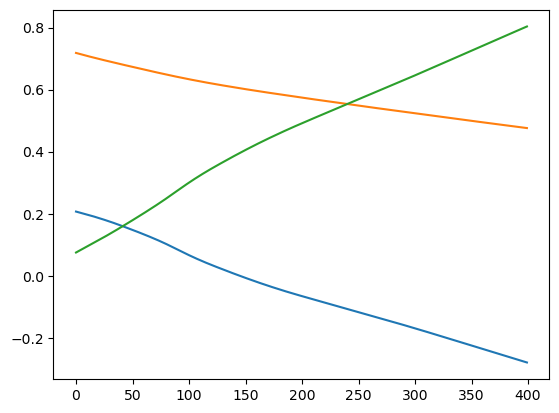

In [18]:
plt.plot(pinn.params_history["w_PDE"])
plt.plot(pinn.params_history["w_data"])
plt.plot(pinn.params_history["w_BC"])


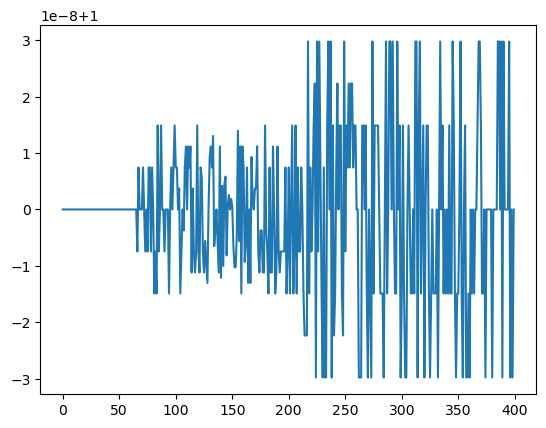

In [19]:
import numpy as np
plt.plot(np.array(pinn.params_history["w_BC"])+np.array(pinn.params_history["w_PDE"])+np.array(pinn.params_history["w_data"]))